In [8]:
import cv2
from matplotlib import pyplot as plt

In [11]:
facemodel= "C:/Users/Asus/Documents/models/model/opencv_face_detector_uint8.pb"
faceconfig= "C:/Users/Asus/Documents/models/model/opencv_face_detector.pbtxt"

agemodel= "C:/Users/Asus/Documents/models/model/age_net.caffemodel"
ageconfig= "C:/Users/Asus/Documents/models/model/age_deploy.prototxt"

gendermodel= "C:/Users/Asus/Documents/models/model/gender_net.caffemodel"
genderconfig= "C:/Users/Asus/Documents/models/model/gender_deploy.prototxt"

faceNet = cv2.dnn.readNet(facemodel,faceconfig)
ageNet = cv2.dnn.readNet(agemodel,ageconfig)
genderNet = cv2.dnn.readNet(gendermodel,genderconfig)

gender=['Male' , 'Female']
ages= ['(1-2)','(4-6)','(8-12)','(15-20)','(25-32)','(38-43)','(48-53)','(60-100)']


In [50]:


def faceDetection(image):
    imageCopy= image.copy()
    imageHeight= imageCopy.shape[0]
    imageWidth= imageCopy.shape[1]



    blob= cv2.dnn.blobFromImage(image=imageCopy,scalefactor=1.0,size=(200,200),mean=(104,117,123),swapRB=True,crop=False)
    faceNet.setInput(blob)


    detections = faceNet.forward()


    bboxes=[]
    for i in range(detections.shape[2]):
        if detections[0,0,i,2]> 0.7:
            x1=int(detections[0,0,i,3] * imageWidth)
            y1=int(detections[0,0,i,4] * imageHeight)
            x2=int(detections[0,0,i,5] * imageWidth)
            y2=int(detections[0,0,i,6] * imageHeight)
            bboxes.append([x1,y1,x2,y2])
            cv2.rectangle(imageCopy,(x1,y1),(x2,y2),(0,255,0),8)
            
       

    return [imageCopy, bboxes]
    
        



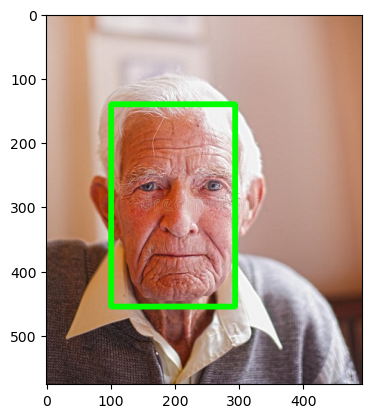

'Male,(60-100)'

In [66]:
image= cv2.imread("C:/Users/Asus/Documents/datasets/Male/2.jpg")

padding = 20
gender=['Male' , 'Female']
ages= ['(1-2)','(4-6)','(8-12)','(15-20)','(25-32)','(38-43)','(48-53)','(60-100)']
means= [78,87,114]
[imageFace,bboxes] = faceDetection(image)
for bbox in bboxes:
    face = image[max(0,bbox[1]-padding):min(bbox[3]+padding,image.shape[0]), max(0,bbox[0]-padding):min(bbox[2]+padding,image.shape[1])]
    blob = cv2.dnn.blobFromImage(face,1.0,(227,227),means,swapRB=False)
    
    ageNet.setInput(blob)
    agePredict= ageNet.forward()
    agePic = ages[agePredict[0].argmax()]  
    
    genderNet.setInput(blob)
    genderPredict= genderNet.forward()
    genderPic = gender[genderPredict[0].argmax()]
    
    info = '{},{}'.format(genderPic,agePic)
    

imageFace = cv2.cvtColor(imageFace,cv2.COLOR_BGR2RGB)
plt.imshow(imageFace)
plt.show()
info